In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/zgulde/tidytuesday/master/data/2022/2022-02-01/breed_traits.csv')

This dataset contains information on different dog breeds. Answer the following questions:

- How many breeds have an energy level of 5? `35`
- How many different coat types are there? `10`
- What is the average drooling level of breeds with a long coat length? `1.483`
- What is the barking level of Anatolian Shepherd Dogs? `3`
- How many breeds have a smooth coat type, a short coat length, and a playfulness level of 3? `27`
- What percentage of breeds fall into each value of adaptability level? Make a visualization like the one below showing this

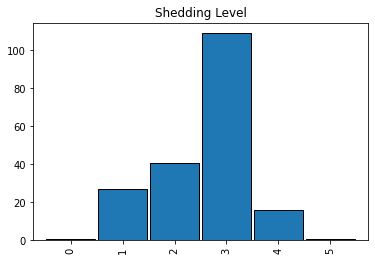

In [3]:
df.head()

,Breed,Affectionate With Family,Good With Young Children,Good With Other Dogs,Shedding Level,Coat Grooming Frequency,Drooling Level,Coat Type,Coat Length,Openness To Strangers,Playfulness Level,Watchdog/Protective Nature,Adaptability Level,Trainability Level,Energy Level,Barking Level,Mental Stimulation Needs
0,Retrievers (Labrador),5,5,5,4,2,2,Double,Short,5,5,3,5,5,5,3,4
1,French Bulldogs,5,5,4,3,1,3,Smooth,Short,5,5,3,5,4,3,1,3
2,German Shepherd Dogs,5,5,3,4,2,2,Double,Medium,3,4,5,5,5,5,3,5
3,Retrievers (Golden),5,5,5,4,2,2,Double,Medium,5,4,3,5,5,3,1,4
4,Bulldogs,4,3,3,3,3,3,Smooth,Short,4,4,3,3,4,3,2,3


- How many breeds have an energy level of 5? `35`


In [84]:
(df['Energy Level'] == 5).sum()

35

- How many different coat types are there? `10`


In [6]:
df['Coat Type'].nunique()

10

- What is the average drooling level of breeds with a long coat length? `1.483`


In [8]:
df[df['Coat Length'] == 'Long']['Drooling Level'].mean()

1.4827586206896552

- What is the barking level of Anatolian Shepherd Dogs? `3`


In [38]:
df.sort_values(by='Breed').head(11)

,Breed,Affectionate With Family,Good With Young Children,Good With Other Dogs,Shedding Level,Coat Grooming Frequency,Drooling Level,Coat Type,Coat Length,Openness To Strangers,Playfulness Level,Watchdog/Protective Nature,Adaptability Level,Trainability Level,Energy Level,Barking Level,Mental Stimulation Needs
162,Affenpinschers,3,3,3,3,3,1,Wiry,Short,5,3,3,4,3,3,3,3
121,Afghan Hounds,3,3,3,1,4,1,Silky,Long,3,3,3,3,1,4,3,3
61,Airedale Terriers,3,3,3,1,3,1,Wiry,Short,3,3,5,3,3,3,3,3
47,Akitas,3,3,1,3,3,1,Double,Medium,2,3,5,3,3,4,2,3
64,Alaskan Malamutes,3,3,3,3,3,1,Double,Medium,3,3,4,3,5,4,3,3
184,American English Coonhounds,3,3,5,2,1,1,Smooth,Short,3,3,3,3,3,4,4,3
118,American Eskimo Dogs,5,5,3,3,3,1,Double,Medium,5,3,3,4,4,4,3,3
191,American Foxhounds,3,5,5,3,1,1,Smooth,Short,3,3,3,3,3,4,5,3
128,American Hairless Terriers,5,5,3,1,1,1,Hairless,Short,3,3,3,5,5,3,3,3
81,American Staffordshire Terriers,5,3,3,2,1,1,Smooth,Short,4,3,5,3,3,3,3,3


In [43]:
(df['Breed'] == 'Anatolian Shepherd Dogs').sum()

0

In [44]:
df[df['Breed'] == 'Anatolian Shepherd Dogs']

,Breed,Affectionate With Family,Good With Young Children,Good With Other Dogs,Shedding Level,Coat Grooming Frequency,Drooling Level,Coat Type,Coat Length,Openness To Strangers,Playfulness Level,Watchdog/Protective Nature,Adaptability Level,Trainability Level,Energy Level,Barking Level,Mental Stimulation Needs


In [75]:
df[df.Breed.str.startswith('Anatolian')]['Barking Level'].values[0]

3

- How many breeds have a smooth coat type, a short coat length, and a playfulness level of 3? `27`


In [27]:
((df['Coat Type'] == 'Smooth') & (df['Coat Length'] == 'Short') & (df['Playfulness Level'] == 3)).sum()

27

- What percentage of breeds fall into each value of adaptability level? Make a visualization like the one below showing this

In [68]:
n_breeds = df.Breed.nunique()
al = pd.DataFrame(df.groupby('Adaptability Level').count().Breed.apply(lambda row: row / n_breeds))
al = al.reset_index()
al

,Adaptability Level,Breed
0,0,0.005128
1,3,0.312821
2,4,0.574359
3,5,0.107692


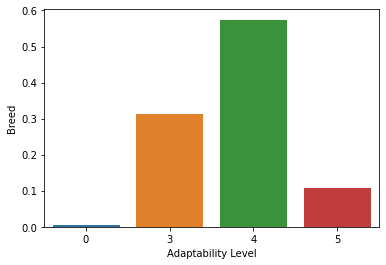

In [82]:
sns.barplot(x='Adaptability Level', y='Breed', data=al)
plt.show()